## eda

LIT REVIEW:
* we should focus on congestion in bottom half of metal layers; as in the deeper layers of netlist? because the higher layers tend to have more dependencies. focusing on deeper layers would help with the whole chip
* 8 layer graph attention network w size 16 intermediate (hidden) state
* graph attention network performs better with no ground truth labels than graph convolution network
1. takes a node and all its 1-hop neighbors (N) and creates a feature vector.



counter_congestion.rpt
* i dont rly understand what "layer" means in this context
* tells the congestion demand per node boundary?
* what do the boundary numbers mean though

counter-congestion.png
* are we supposed to produce an image like this? or is this the solution?? im so confused

route_opt.check_routes
* summary: good ? are we supposed to produce a check like this


In [2]:
import gzip
import json
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix

In [3]:
import matplotlib.pyplot as plt

In [6]:
with gzip.open('../xbar/1/xbar.json.gz','rb') as f:
    design1 = json.loads(f.read().decode('utf-8'))

instances1 = pd.DataFrame(design1['instances'])
nets1 = pd.DataFrame(design1['nets'])

In [7]:
## clk_gate_out_reg instances
clk_gate = instances1.loc[instances1.name.str.contains(r'.out_reg')]
## valid_reg instances
valid_reg = instances1.loc[instances1.name.str.startswith('valid_reg')]
## out_reg instances
out_reg = instances1.loc[instances1.name.str.startswith('out_reg')]
## U instances
U = instances1.loc[instances1.name.str.startswith('U')]
## ZCTSBUF instances
ZCTSBUF = instances1.loc[instances1.name.str.startswith('ZCTSBUF')]

len(clk_gate) + len(out_reg) + len(U) + len(ZCTSBUF) + len(valid_reg) == len(instances1)

True

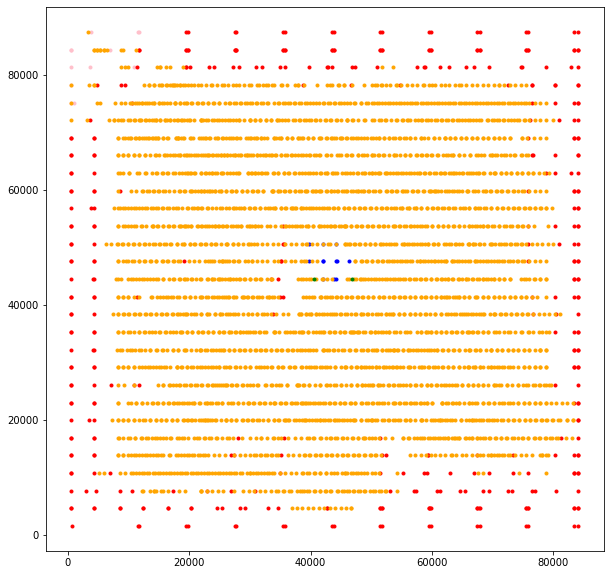

In [9]:
plt.figure(figsize=(10, 10))
for i in range(len(instances1)):
    if instances1.loc[i]['name'].startswith('clk_gate'):
        plt.plot(instances1.loc[i]['xloc'], instances1.loc[i]['yloc'], marker = '.', color = 'blue')
    elif instances1.loc[i]['name'].startswith('out_reg'):
        plt.plot(instances1.loc[i]['xloc'], instances1.loc[i]['yloc'], marker = '.', color = 'red')
    elif instances1.loc[i]['name'].startswith('U'):
        plt.plot(instances1.loc[i]['xloc'], instances1.loc[i]['yloc'], marker = '.', color = 'orange')
    elif instances1.loc[i]['name'].startswith('ZCTSBUF'):
        plt.plot(instances1.loc[i]['xloc'], instances1.loc[i]['yloc'], marker = '.', color = 'green')
    elif instances1.loc[i]['name'].startswith('valid_reg'):
        plt.plot(instances1.loc[i]['xloc'], instances1.loc[i]['yloc'], marker = '.', color = 'pink')


In [6]:
instances1.orient.unique()

array([0, 6, 4, 2])

In [7]:
with gzip.open('NCSU-DigIC-GraphData-2023-07-25/xbar/2/xbar.json.gz','rb') as f:
    design2 = json.loads(f.read().decode('utf-8'))

instances2 = pd.DataFrame(design2['instances'])
nets2 = pd.DataFrame(design2['nets'])

In [8]:
# clk_gate_out_reg instances
clk_gate = instances2.loc[instances2.name.str.startswith('clk_gate')]
# valid_reg instances
valid_reg = instances2.loc[instances2.name.str.startswith('valid_reg')]
# out_reg instances
out_reg = instances2.loc[instances2.name.str.startswith('out_reg')]
# U instances
U = instances2.loc[instances2.name.str.startswith('U')]
# ZCTSBUF instances
ZCTSBUF = instances2.loc[instances2.name.str.startswith('ZCTSBUF')]
# ctmTdsLR instances
ctmTdsLR = instances2.loc[instances2.name.str.startswith('ctmTdsLR')]
# SGI instances
SGI = instances2.loc[instances2.name.str.startswith('SGI')]
# HFSINV instances
HFSINV = instances2.loc[instances2.name.str.startswith('HFSINV')]
# ZBUF instances
ZBUF = instances2.loc[instances2.name.str.startswith('ZBUF')]
# HFSBUF instances
HFSBUF = instances2.loc[instances2.name.str.startswith('HFSBUF')]
# ctobgt_inst instances
ctobgt_inst = instances2.loc[instances2.name.str.startswith('ctobgt_inst')]
# cts_inv instances
cts_inv = instances2.loc[instances2.name.str.startswith('cts_inv')]
# ZINV instances
ZINV = instances2.loc[instances2.name.str.startswith('ZINV')]

len(clk_gate) + len(out_reg) + len(U) + len(ZCTSBUF) + len(valid_reg) + \
    len(ctmTdsLR) + len(SGI) + len(HFSINV) + len(ZBUF) + len(HFSBUF) + \
        len(ctobgt_inst) + len(cts_inv) + len(ZINV) == len(instances2)

True

In [9]:
bad = clk_gate.index.append([valid_reg.index, out_reg.index, U.index, \
    ZCTSBUF.index, ctmTdsLR.index, SGI.index, HFSINV.index, ZBUF.index, \
        HFSBUF.index, ctobgt_inst.index, cts_inv.index, ZINV.index])
instances2.drop(bad)

,name,id,xloc,yloc,cell,orient


In [1]:
plt.figure(figsize=(10, 10))
for i in range(len(instances2)):
    if instances2.loc[i]['name'].startswith('clk_gate'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'blue')
    elif instances2.loc[i]['name'].startswith('out_reg'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'red')
    elif instances2.loc[i]['name'].startswith('U'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'orange')
    elif instances2.loc[i]['name'].startswith('ZCTSBUF'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'green')
    elif instances2.loc[i]['name'].startswith('valid_reg'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'pink')
    elif instances2.loc[i]['name'].startswith('ctmTdsLR'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'purple')
    elif instances2.loc[i]['name'].startswith('SGI'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'yellow')
    elif instances2.loc[i]['name'].startswith('HFSINV'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'cyan')
    elif instances2.loc[i]['name'].startswith('ZBUF'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'magenta')
    elif instances2.loc[i]['name'].startswith('HFSBUF'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'black')
    elif instances2.loc[i]['name'].startswith('ctobgt_inst'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'brown')
    elif instances2.loc[i]['name'].startswith('cts_inv'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'indigo')
    elif instances2.loc[i]['name'].startswith('ZINV'):
        plt.plot(instances2.loc[i]['xloc'], instances2.loc[i]['yloc'], marker = '.', color = 'grey')


NameError: name 'plt' is not defined

In [11]:
def buildBST(array,start=0,finish=-1):
    if finish<0:
        finish = len(array)
    mid = (start + finish) // 2
    if mid-start==1:
        ltl=start
    else:
        ltl=buildBST(array,start,mid)
    
    if finish-mid==1:
        gtl=mid
    else:
        gtl=buildBST(array,mid,finish)
        
    return((array[mid],ltl,gtl))

In [13]:
congestion_data = np.load('NCSU-DigIC-GraphData-2023-07-25/xbar/1/xbar_congestion.npz')
xbst = buildBST(congestion_data['xBoundaryList'])
ybst = buildBST(congestion_data['yBoundaryList'])
demand = np.zeros(shape = [instances1.shape[0],])

KeyError: 'xBoundaryList is not a file in the archive'